In [265]:
import pandas as pd
Weather = pd.read_csv('Weather.csv')
#Since weather (and its effects) can differ quite a bit depending on city, only one city was looked at
#For the purpose of this project only Seoul was looked at
#Here, all rows with other cities were dropped
cities=list(Weather["province"].unique())
print("These are the cities you can choose from: ")
for city in cities:
    print (city)
City=input("Which city do you want to look at? ")
if City in cities:
    print(f"In the following, a machine learning algorithm for {City} will be created. ")
else:
    print(f"{City} is an invalid city. Please try again. ")

These are the cities you can choose from: 
Seoul
Busan
Daegu
Gwangju
Incheon
Daejeon
Ulsan
Gyeonggi-do
Gangwon-do
Chungcheongbuk-do
Chungcheongnam-do
Jeollabuk-do
Jeollanam-do
Gyeongsangbuk-do
Gyeongsangnam-do
Jeju-do
Chunghceongbuk-do
Which city do you want to look at? Gyeonggi-do
In the following, a machine learning algorithm for Gyeonggi-do will be created. 


In [266]:
# Task 1: Import the weather data frame and clean it

#Since weather (and its effects) can differ quite a bit depending on city, only one city was looked at
#For the purpose of this project only Seoul was looked at
#Here, all rows with other cities were dropped
Weather=Weather[Weather["province"]==City]
#Since every row coresponds to a date, the was set as the index, and the index type changed from object to datetime
Weather=Weather.set_index("date")
Weather.index = pd.to_datetime(Weather.index)
#Both columns code and province are not needed anymore, which is why they were dropped
Weather=Weather.drop(["code","province"], axis=1)
Weather

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity
date,,,,,,,
2016-01-01,1.6,-4.2,5.7,0.0,2.1,180.0,80.1
2016-01-02,5.8,1.2,10.3,0.0,3.0,180.0,83.1
2016-01-03,6.0,2.7,10.7,0.0,2.1,290.0,92.1
2016-01-04,3.7,-1.0,7.5,0.0,4.6,290.0,54.4
2016-01-05,-1.1,-3.4,2.6,0.0,4.7,320.0,39.6
...,...,...,...,...,...,...,...
2020-06-25,21.6,19.8,23.6,4.4,4.7,180.0,94.3
2020-06-26,21.8,18.7,25.8,2.1,5.7,250.0,85.8
2020-06-27,23.7,20.0,29.3,0.0,3.9,270.0,77.3


In [267]:
#Task 2: Import the dataframe with the cases and clean it

#Reading in the cases dataframe, which was downloaded from Kaggle and saved on the depostiory
Cases = pd.read_csv("TimeProvince.csv")
#As stated in taks 1, only Seoul was looked at. The rows with other cities were dropped
Cases= Cases[Cases["province"]==City]
#From this dataset i only need the case numbers. Consequently, all other columns were dropped
Cases=Cases.drop(["time", "province", "released", "deceased"],axis=1)
#Since every row corresponds to a date, the date was set as index and the datatype changed from object to datetime
Cases= Cases.set_index("date")
Cases.index=pd.to_datetime(Cases.index)

In [268]:
#Task 3: Calculate daily cases
#The cases in the dataframe are cumulative. Since i try to predict daily cases, i need to calculate them

#Column with daily cases created
Cases["daily_cases"]=0
#Here, i start to calculate the daily case based on the cumulative cases.
# To get the daily cases for date x, i need to substract the cumulative case from date x-1 from date x
# First, i need to get all the dates for which i have data in a list.
#Here, this (empty) list is created
index_list=[]
#Next i iterate through the dataframe with the iterrows function and add every index to the list
for index, row in Cases.iterrows():
    index_list.append(index)

# Here, i make the actual calculations. For this, i iterate through the dataframe by using the list with the indexes
# I iterate by using the length of the index list, which corresponds to the length of the dataframe
# I iterate that way, because i need two rows at the time to make the calculation
# I calculate the daily cases and store them in the dataframe under daily_cases
for i in range(len(index_list)):
    Cases.loc[index_list[i],"daily_cases"]=Cases.loc[index_list[i],"confirmed"]-Cases.loc[index_list[i-1],"confirmed"]

#The case number for the first date was wrong. It is supposed to be zero. I corrected it because of that
Cases.loc[index_list[0],"daily_cases"]=0
# I only need the daily cases. The cumulative cases were dropped because of that
Cases=Cases.drop("confirmed",axis=1)

(array([737456., 737485., 737516., 737546., 737577., 737607.]),
 <a list of 6 Text major ticklabel objects>)

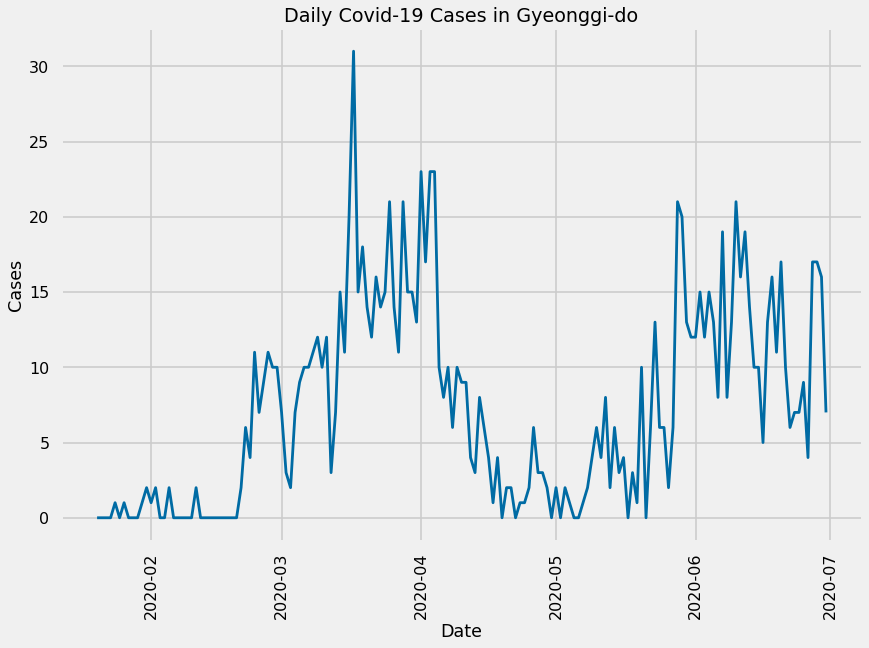

In [269]:
#Just to get a feel for the daily cases, i ploted them using the matplotlib
import matplotlib.pyplot as plt
#Here i changed the style of the plot
plt.style.use(["tableau-colorblind10","seaborn-poster"])
plt.xlabel('Date'); plt.ylabel('Cases'); plt.title(f'Daily Covid-19 Cases in {City}');
plt.plot(Cases)
plt.xticks(rotation=90)
#The x-axis was not readable very well. Because of this, i rotated it to be vertical instead of horizontal

In [270]:
#Task 4: Merging both dataframes
# Here, both dataframes are joined using pandas merge function
# The "inner" method is used in order to get rid of all the dates in which there are is no data for corona cases
# For better visualisation of the inner method see the picture below
df=pd.merge(Weather,Cases, how='inner', left_index=True, right_index=True)
df

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,daily_cases
date,,,,,,,,
2020-01-20,1.2,-2.8,5.7,0.0,6.4,290.0,68.5,0
2020-01-21,-0.7,-5.9,5.4,0.0,2.7,140.0,61.4,0
2020-01-22,2.1,-1.3,5.1,0.0,4.3,110.0,72.4,0
2020-01-23,4.1,-1.4,10.7,0.0,4.6,290.0,71.6,0
2020-01-24,2.4,-2.2,9.2,0.0,3.4,250.0,85.0,1
...,...,...,...,...,...,...,...,...
2020-06-25,21.6,19.8,23.6,4.4,4.7,180.0,94.3,9
2020-06-26,21.8,18.7,25.8,2.1,5.7,250.0,85.8,4
2020-06-27,23.7,20.0,29.3,0.0,3.9,270.0,77.3,17


In [271]:
df=df.dropna()

![Image of Yaktocat](https://miro.medium.com/max/1200/1*9eH1_7VbTZPZd9jBiGIyNA.png)

Task 5: Get a feel for the tidy datafram
Here, different methods are used to get details about the dataframe, like how the data looks, what the shape is, etc.

In [272]:
# Get the first five rows
df.head(10)

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,daily_cases
date,,,,,,,,
2020-01-20,1.2,-2.8,5.7,0.0,6.4,290.0,68.5,0
2020-01-21,-0.7,-5.9,5.4,0.0,2.7,140.0,61.4,0
2020-01-22,2.1,-1.3,5.1,0.0,4.3,110.0,72.4,0
2020-01-23,4.1,-1.4,10.7,0.0,4.6,290.0,71.6,0
2020-01-24,2.4,-2.2,9.2,0.0,3.4,250.0,85.0,1
2020-01-25,2.8,-2.2,9.1,0.0,2.5,320.0,90.8,0
2020-01-26,5.3,-2.7,11.9,0.0,5.2,90.0,74.3,1
2020-01-27,5.9,3.5,8.1,0.0,5.0,70.0,71.5,0
2020-01-28,7.4,3.9,11.0,0.0,3.4,50.0,70.4,0


In [273]:
# Get the shape of the data frame
print('The shape of the datafram is:', df.shape)

The shape of the datafram is: (162, 8)


In [274]:
# Get Descriptive statistics for each column
df.describe()

,avg_temp,min_temp,max_temp,precipitation,max_wind_speed,most_wind_direction,avg_relative_humidity,daily_cases
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,11.517284,6.545062,17.177160,0.396914,5.022222,234.629630,75.277778,7.407407
std,7.961223,8.099820,8.415051,2.714979,1.446392,72.849192,11.639614,6.739662
min,-7.200000,-11.900000,-3.100000,0.000000,2.200000,50.000000,40.000000,0.000000
25%,5.675000,0.400000,10.625000,0.000000,4.200000,250.000000,68.600000,1.000000
50%,9.850000,4.950000,17.050000,0.000000,4.850000,270.000000,74.000000,6.000000
75%,18.300000,13.100000,23.950000,0.000000,5.700000,270.000000,83.750000,12.000000
max,26.500000,21.600000,34.000000,29.500000,9.700000,360.000000,99.900000,31.000000


Task 6: Seperating the data frame to features and targets
For the machine learning algorithm, the features need do be seperated from the targets. The targets are what needs to be predicted. In this case, this are the daily cases The features are all the other columns here. These are used, to predict the daily cases.

Additonally, to make predicitions/for the algorithm to work the dataframes need to be transformed into a numpy array

In [275]:
# This code was copide from: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
#labels = np.array(df['daily_cases'])
labels = df['daily_cases']
# Remove the labels from the features
# axis 1 refers to the columns
df= df.drop('daily_cases', axis = 1)
# Saving feature names for later use
feature_list = list(df.columns)
from sklearn.preprocessing import normalize
df=normalize(df, norm='l2', axis=0)
# Convert to numpy array
#df = np.array(df)

Task 7: Seperation of training and testing data.

As a final step of data preperation, the data is split into training and testing data. During training, we let the model ‘see’ the answers, in this case the daily cases, so it can learn how to predict the case numbers from the features. We expect there to be some relationship between all the features and the target value, and the model’s job is to learn this relationship during training. Then, when it comes time to evaluate the model, we ask it to make predictions on a testing set where it only has access to the features (not the answers)! Because we do have the actual answers for the test set, we can compare these predictions to the true value to judge how accurate the model is. Generally, when training a model, we randomly split the data into training and testing sets to get a representation of all data points (if we trained on the first nine months of the year and then used the final three months for prediction, our algorithm would not perform well because it has not seen any data from those last three months.) I am setting the random state to 42 which means the results will be the same each time I run the split for reproducible results.

The description was copied from: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [276]:
#Choosing the split betweeen training and testing data
split=float(input("How much percent of the data do you want to be testing data? (e.g. 30) "))
split=split/100
if split > 0 and split <1:
    print(f"The data is going to be split into {(1-split)*100}% training data and {split*100}% testing data. ")
else:
    print("You have chosen an incorrect percentage. It needs to be larger than 0% and smaller than 100%. Please try again. ")

How much percent of the data do you want to be testing data? (e.g. 30) 30
The data is going to be split into 70.0% training data and 30.0% testing data. 


In [277]:
# This code was copide from: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Here we now have 70% training data and 30% testing data (See test_size)
train_features, test_features, train_labels, test_labels = train_test_split(df, labels, test_size = split, random_state = 42)

In [278]:
# To check if everything worked we look at the shape of the areas. The training arrays need to have the same amount of rows
# The same counts for the testing arrays. Both array with feature also need to have the same amount of columns
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (113, 7)
Training Labels Shape: (113,)
Testing Features Shape: (49, 7)
Testing Labels Shape: (49,)


Task 8: Calculating baseline
To evaluate wether the machine learning model is any good, we need to establish a baseline that the algorithm needs to beat. The algorithm needs to be better than this baseline. If it's not better, the algorithm dosen't help much. For this project, the baseline is the average amount of cases per day. 

In [279]:
# The baseline predictions are the historical averages
baseline_preds = Cases["daily_cases"].mean()
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
baseline_error= round(np.mean(baseline_errors), 2)
print('Average baseline error: ', baseline_error )

Average baseline error:  5.67


Task 9: Train the model

To train the model the Scikit-learn library is used. We import the random forest regression model from skicit-learn, instantiate the model, and fit (scikit-learn’s name for training) the model on the training data. The  random state is again set at 42 for reproducible results.

In [280]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [281]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 4.88


In [282]:
accuracy={}
parameter_tuning={}
for i in range(1,11):
    for n in range (2,8):
        for s in range(1,3):
            if s==1:
                x=True
            elif s==2:
                x=False
            rf = RandomForestRegressor(n_estimators = 100, max_features=n, min_samples_leaf=i, bootstrap=x,random_state=42)
            # Train the model on training data
            rf.fit(train_features, train_labels)
            # Use the forest's predict method on the test data
            predictions = rf.predict(test_features)
            # Calculate the absolute errors
            errors = abs(predictions - test_labels)
            # Print out the mean absolute error (mae)
            MAE= round(np.mean(errors), 2)
            accuracy[f"complexity {i} and mtry {n} and bootstrap {x}"]=MAE
            parameter_tuning[f"complexity {i} and mtry {n} and bootstrap {x}"]=[i, n, x]
parameters=min(accuracy, key=accuracy.get)
print(parameters)

complexity 2 and mtry 2 and bootstrap True


In [283]:
x,y,z=parameter_tuning[parameters]
rf = RandomForestRegressor(n_estimators = 100, max_features=parameter_tuning[parameters][1], min_samples_leaf=parameter_tuning[parameters][0],bootstrap=parameter_tuning[parameters][2], random_state=42)
# Train the model on training data
rf.fit(train_features, train_labels)
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
MAE= round(np.mean(errors), 2)
print('Mean Absolute Error:', round(np.mean(errors), 2), "cases")

Mean Absolute Error: 4.61 cases


In [284]:
# Task: Evalutation of the model
# Here the error of the model is compared with the baseline.
# If it is lower than the baseline, the model is (somewhat) effective.
# If it is higher than the baseline, it is useless. You get a better result if you predict the average everytime
# This comparison will be done with an if-else statement. It then prints out a message that says wether the model is good or not
if MAE < baseline_error:
    print (f"The mean absolute error (MAE) of the model, {MAE}, is lower than the baseline error of {baseline_error}.\nTherfore the model is sufficiently good and can be accepted!")
else:
    print (f"The mean absolute error (MAE) of the model, {MAE}, is higher than the baseline error of {baseline_error}.\nTherfore the model is useless and needs to be discarded!")

The mean absolute error (MAE) of the model, 4.61, is lower than the baseline error of 5.67.
Therfore the model is sufficiently good and can be accepted!


In [285]:
# Installing needed package for Visualizing one deciscion tree in the random forest
# Code from: https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install pydot

In [286]:
# Installing needed package for Visualizing one deciscion tree in the random forest
#Code from: https://www.codesofinterest.com/2017/02/visualizing-model-structures-in-keras.html
#conda install graphviz

In [287]:
#Visualizing one tree from random forest and exporting as png
# Code from: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

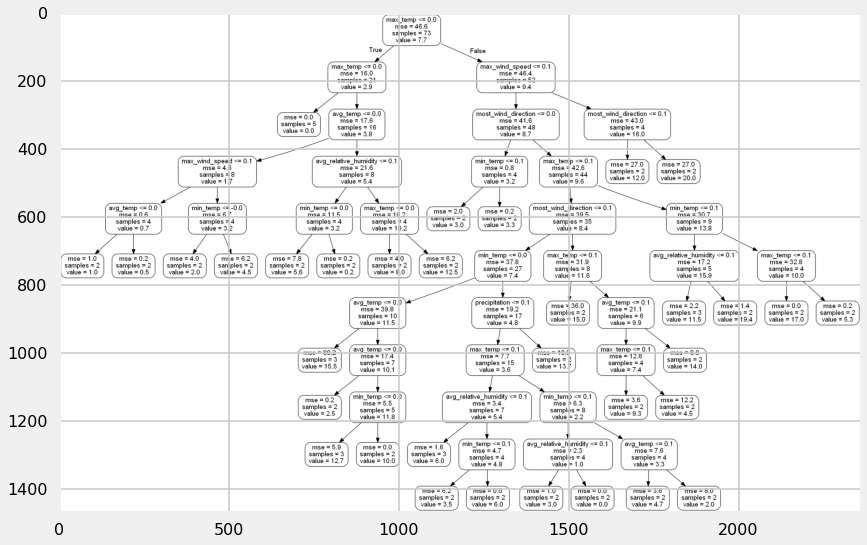

In [288]:
# Showing png of one tree of random forest
# Code from: https://stackoverflow.com/questions/20597088/display-a-png-image-from-python-on-mint-15-linux
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('tree.png')
plt.imshow(img)
plt.show()

In [289]:
#For entire forest: How important was every feature in making a prediction?
#Code from: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: max_temp             Importance: 0.23
Variable: avg_relative_humidity Importance: 0.21
Variable: avg_temp             Importance: 0.18
Variable: min_temp             Importance: 0.17
Variable: max_wind_speed       Importance: 0.11
Variable: most_wind_direction  Importance: 0.09
Variable: precipitation        Importance: 0.01


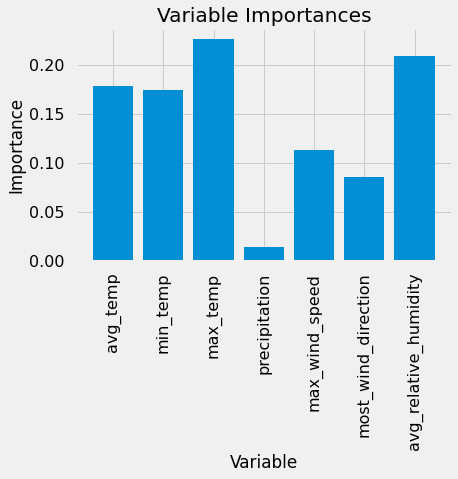

In [290]:
#Visualizing how important each feature is (See task above)
# Code from: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Text(0.5, 1.0, 'Actual and Predicted Values for Gyeonggi-do')

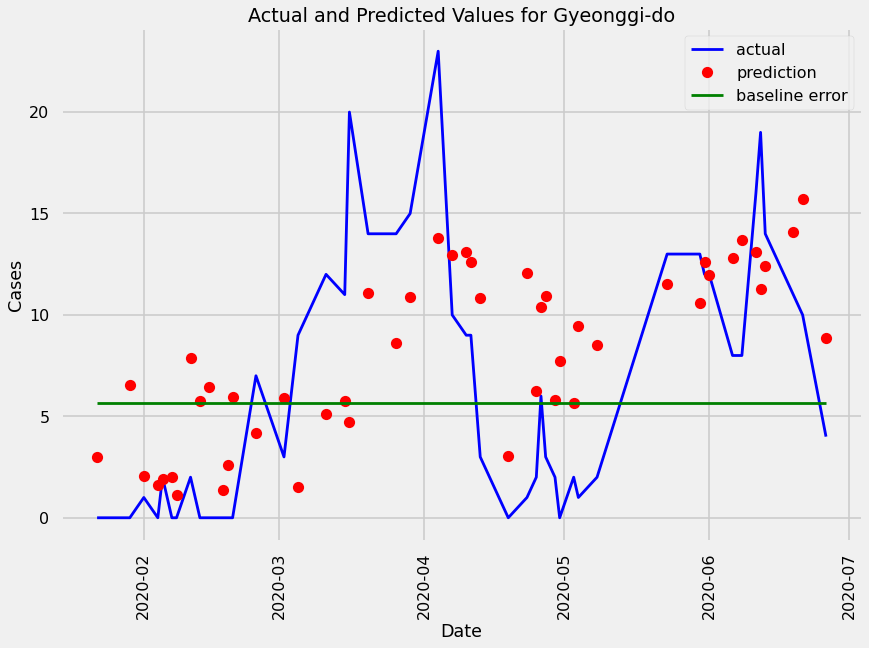

In [291]:
# Dataframe with true values and dates
true_data = pd.DataFrame(data = {'date': test_labels.index, 'actual': test_labels})
# Dataframe with predictions and dates
predictions_data = pd.DataFrame(data = {'date': test_labels.index, 'prediction': predictions})
#dataframe with baseline
baseline_data= pd.DataFrame(data= {"date":test_labels.index, "baseline error":baseline_error })
#Sorting df
true_data.sort_index(inplace=True, ascending=True)
predictions_data=predictions_data.set_index("date",drop=False)
predictions_data.sort_index(inplace=True, ascending=True)
baseline_data=baseline_data.set_index("date",drop=False)
baseline_data.sort_index(inplace=True, ascending=True)
# Plot the actual values
plt.style.use(["tableau-colorblind10","seaborn-poster"])
plt.plot( true_data['date'],true_data['actual'], 'b-', label = 'actual')
# Plot the predicted values
plt.plot( predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.plot( baseline_data['date'],baseline_data['baseline error'], 'g-', label = 'baseline error')
plt.xticks(rotation = '90'); 
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Cases'); plt.title(f'Actual and Predicted Values for {City}')